In [1]:
from libraries.DORACalc import DORA
from libraries.Plotter import plotter
from libraries.Utilities import grabber
from libraries.Utilities import Ha_to_kJmol
from libraries.PrinterIO import PrintFits


[2.35205, 2.55717821, 2.76230641, 2.96743462, 3.17256282, 3.37769103, 3.58281923, 3.78794744, 3.99307564, 4.19820385, 4.40333205, 4.60846026, 4.81358846, 5.01871667, 5.22384487, 5.42897308, 5.63410128, 5.83922949, 6.04435769, 6.2494859, 6.4546141, 6.65974231, 6.86487051, 7.06999872, 7.27512692, 7.48025513, 7.68538333, 7.89051154, 8.09563974, 8.30076795, 8.50589615, 8.71102436, 8.91615256, 9.12128077, 9.32640897, 9.53153718, 9.73666538, 9.94179359, 10.14692179, 10.35205] [-4608821.676258192, -4608808.556433329, -4608785.539578537, -4608760.461772672, -4608738.44940886, -4608719.754464738, -4608705.063694737, -4608693.937083629, -4608685.889654839, -4608680.546987806, -4608676.906835087, -4608674.2398642795, -4608672.298687942, -4608670.871579911, -4608669.781375056, -4608668.939110842, -4608668.213525937, -4608667.635052554, -4608667.097409724, -4608666.627374383, -4608666.192295516, -4608665.78425843, -4608665.435303884, -4608665.138783883, -4608664.872169837, -4608664.669278864, -4608

d:\OneDrive\TCH TU Wien\Arbeit_PodewitzLAB\DORA_Paper\DORA_Python\libraries\DORACalc.py:131: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sig, pcov_sig = curve_fit(self.sigmoid, [self.distance_data[0],self.infinite_distance],


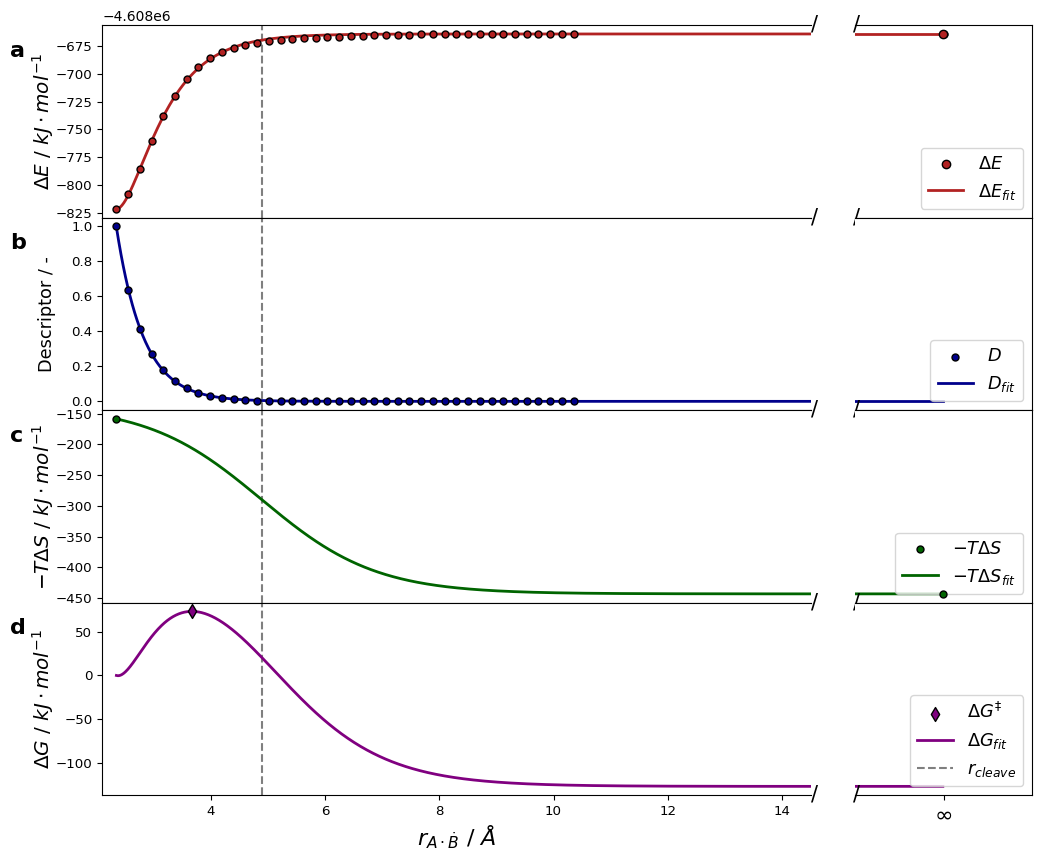

In [2]:
r_dummy = grabber("D:\\OneDrive\\TCH TU Wien\\Arbeit_PodewitzLAB\\TestData\\E_r.dat", 0, True)
dE_dummy = grabber("D:\\OneDrive\\TCH TU Wien\\Arbeit_PodewitzLAB\\TestData\\dE.dat", 4)

    
dE_A = -941.62440619*2625.5
dE_B =  -813.72282739*2625.5

dE_dummy = Ha_to_kJmol(dE_dummy)

D_dummy =  grabber("D:\\OneDrive\\TCH TU Wien\\Arbeit_PodewitzLAB\\TestData\\IBSI.dat", 9)
TdS = [0.06042376*(-2625), 0.06561607*(-2625), 0.10318652*(-2625)] 


print(r_dummy, dE_dummy, D_dummy)

test = DORA(D_dummy, r_dummy, dE_dummy,dE_A, dE_B , TdS[0], TdS[1], TdS[2] , infinite_distance=15,k_start=20, savepath="D:\\OneDrive\\TCH TU Wien\\Arbeit_PodewitzLAB\\TestData").run()

plotter(test)

path_test = 'D:\\OneDrive\\TCH TU Wien\\Arbeit_PodewitzLAB\\TestData\\'

PrintFits(test, savepath=path_test)

#printer
